___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part - 2<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Time Series Generator)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

In [3]:
df = pd.read_csv('./energydata_complete.csv',index_col='date', parse_dates = True)

In [4]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


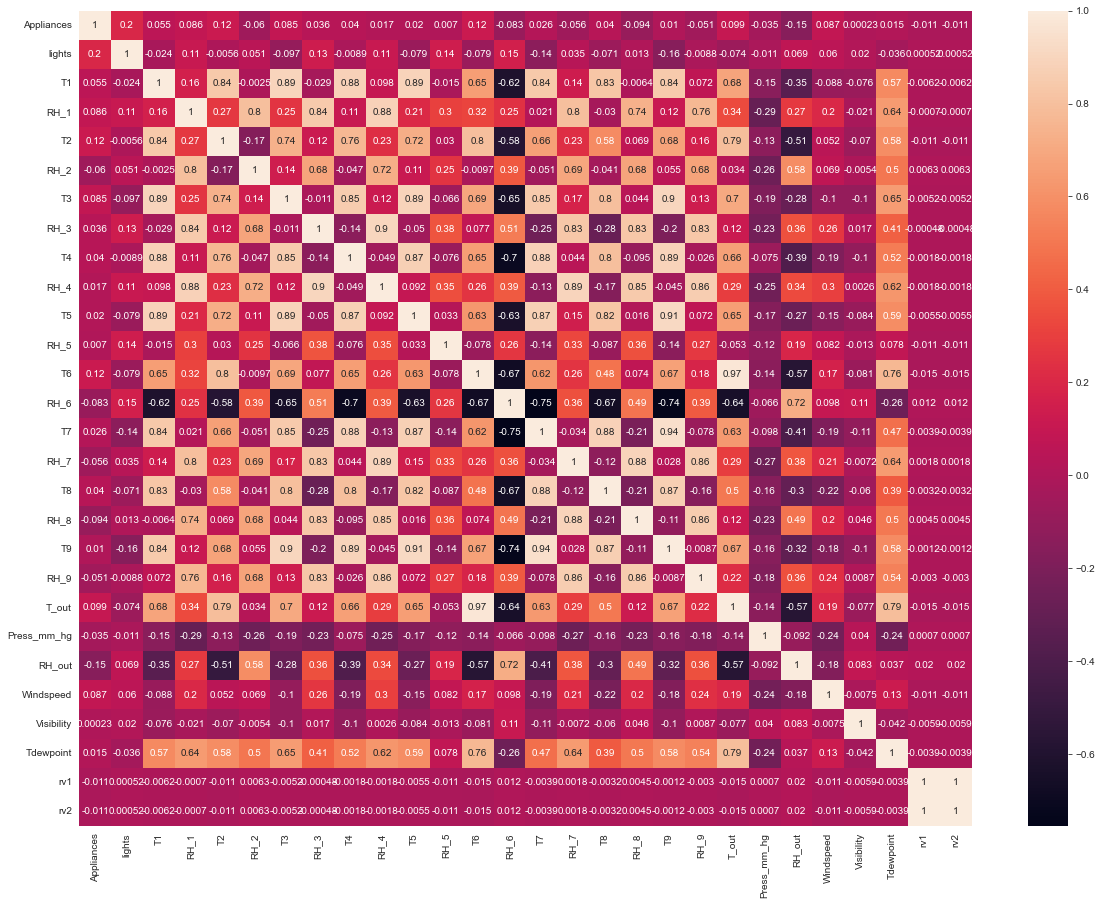

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

In [15]:
df.corr()[df.corr()<1].max()

Appliances    0.197
lights        0.197
T1            0.892
RH_1          0.880
T2            0.837
RH_2          0.798
T3            0.901
RH_3          0.899
T4            0.889
RH_4          0.899
T5            0.911
RH_5          0.375
T6            0.975
RH_6          0.719
T7            0.945
RH_7          0.894
T8            0.882
RH_8          0.884
T9            0.945
RH_9          0.859
T_out         0.975
Press_mm_hg   0.040
RH_out        0.719
Windspeed     0.300
Visibility    0.109
Tdewpoint     0.791
rv1           0.020
rv2           0.020
dtype: float64

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [16]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [17]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [18]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [20]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [21]:
df_a = df_a.resample("H").sum()
df_b = df_b.resample("H").mean()

In [22]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [23]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [24]:
df = df.round(2)

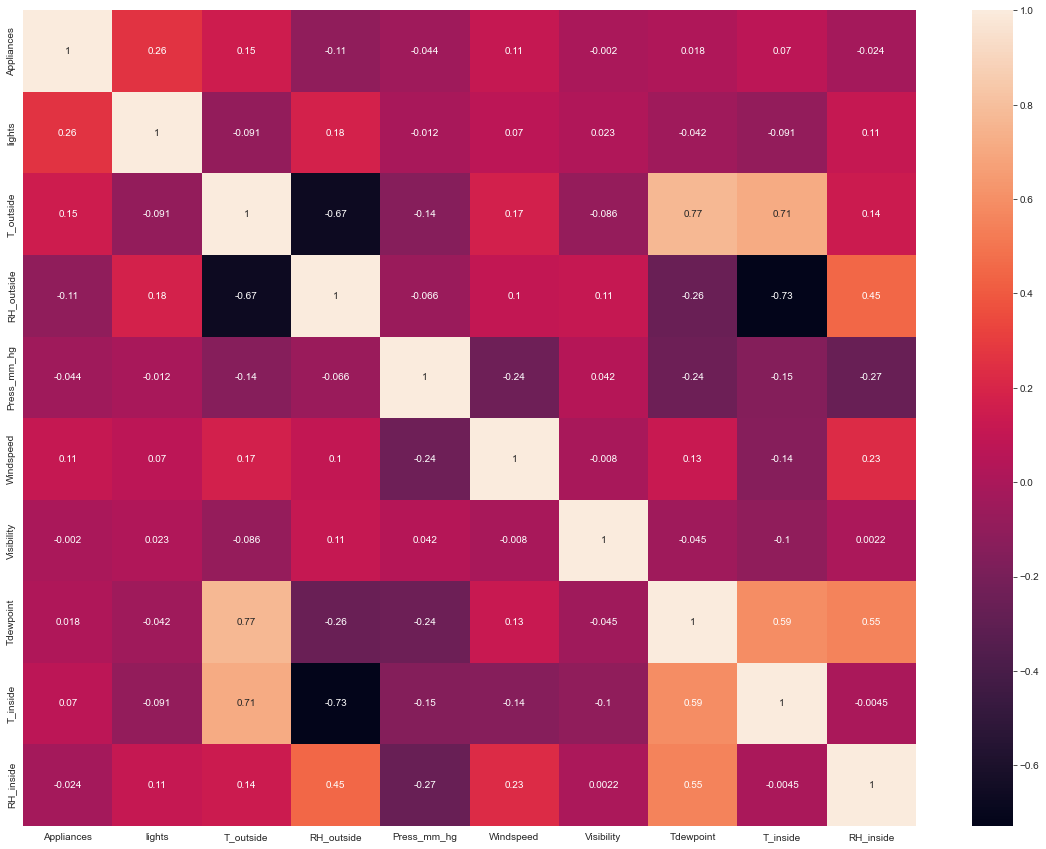

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

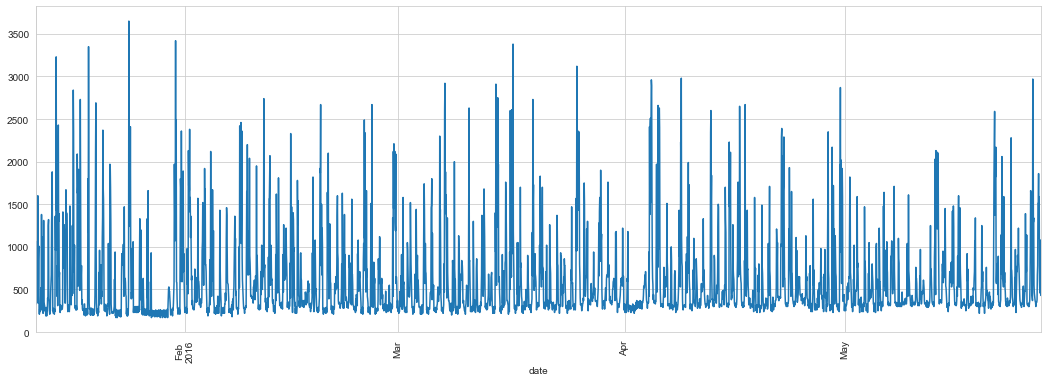

In [17]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

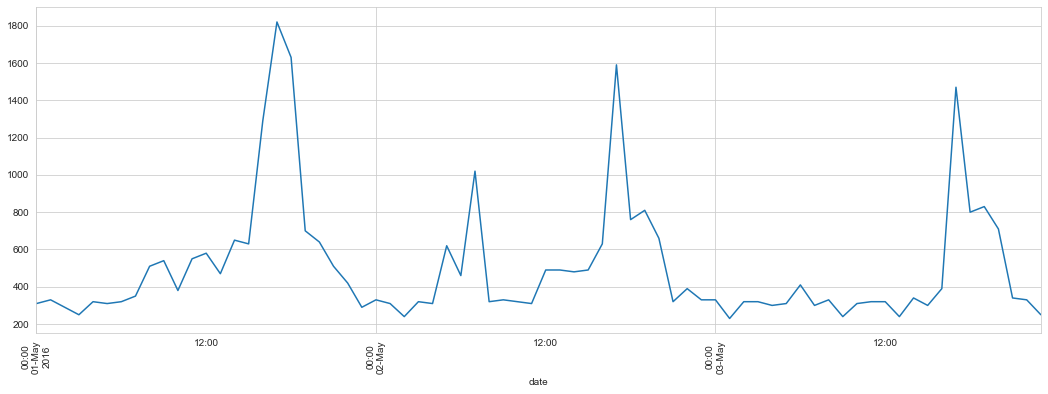

In [18]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

### Train Test Split

In [26]:
len(df)

3290

In [27]:
# How many rows per day?
24

24

In [28]:
test_days = 7

In [29]:
test_ind = test_days*24

In [30]:
test_ind

168

In [31]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [32]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

In [33]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [36]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [38]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [39]:
n_features = train_scaled.shape[1]

In [40]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [42]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 31s 9ms/step - loss: 0.0093 - val_loss: 0.0051
Epoch 2/10
3098/3098 [==============================] - 27s 9ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 3/10
3098/3098 [==============================] - 28s 9ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 4/10
3098/3098 [==============================] - 27s 9ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 5/10
3098/3098 [==============================] - 28s 9ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/10
3098/3098 [==============================] - 27s 9ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 7/10
3098/3098 [==============================] - 28s 9ms/step - loss: 0.0039 - val_loss: 0.0041


<AxesSubplot:>

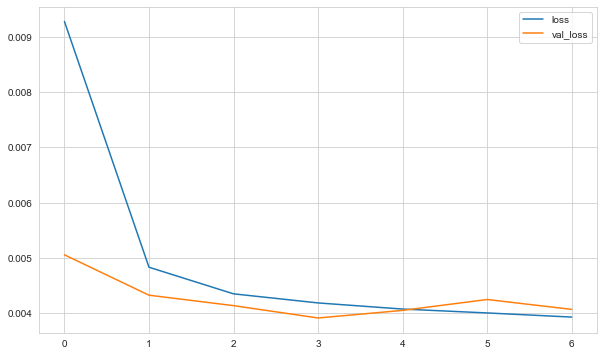

In [43]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [46]:
train_scaled

array([[0.04597701, 0.67741935, 0.36747872, ..., 0.53060285, 0.24072217,
        0.72111369],
       [0.25574713, 1.        , 0.35544467, ..., 0.51265532, 0.23971916,
        0.71972158],
       [0.25      , 0.48387097, 0.34605225, ..., 0.5002301 , 0.26780341,
        0.81948956],
       ...,
       [0.03448276, 0.        , 0.79189903, ..., 0.86746434, 0.72016048,
        0.65614849],
       [0.08045977, 0.        , 0.78544174, ..., 0.81316153, 0.73420261,
        0.69605568],
       [0.0862069 , 0.03225806, 0.76342824, ..., 0.75977911, 0.75025075,
        0.80510441]])

In [47]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [48]:
predictions_scaled

[array([ 0.03821847, -0.02166268,  0.7231078 ,  0.03762935,  0.64989793,
         0.29974508,  0.594552  ,  0.739194  ,  0.75254637,  0.7648344 ],
       dtype=float32),
 array([ 0.02726599, -0.06321058,  0.7011932 ,  0.09456006,  0.63682705,
         0.23924273,  0.5666193 ,  0.7363526 ,  0.75767434,  0.707528  ],
       dtype=float32),
 array([ 0.02330152, -0.0822482 ,  0.68418586,  0.14297965,  0.6261688 ,
         0.19043717,  0.5623403 ,  0.7408612 ,  0.76489305,  0.68600816],
       dtype=float32),
 array([ 0.02036917, -0.09289514,  0.6654874 ,  0.18366973,  0.6149148 ,
         0.14281026,  0.55507314,  0.7458669 ,  0.7728994 ,  0.6785731 ],
       dtype=float32),
 array([ 0.01697863, -0.09900001,  0.64686906,  0.21698576,  0.6026509 ,
         0.09745877,  0.5449879 ,  0.7519954 ,  0.7807799 ,  0.6774384 ],
       dtype=float32),
 array([ 0.01313676, -0.10353984,  0.630557  ,  0.24201521,  0.58973944,
         0.05645847,  0.53413755,  0.75847405,  0.78888136,  0.67915165],
   

In [49]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -9.223448391981584 
mae: 0.1360282310484519 
mse: 0.03513765079402391 
rmse: 0.18745039555579474


## Inverse Transformations and Compare

In [50]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
0,303.000,-6.715,18.706,4.722,757.248,4.191,39.816,9.583,23.523,47.492
1,264.886,-19.595,17.960,10.352,756.687,3.430,38.012,9.521,23.574,46.257
2,251.089,-25.497,17.380,15.141,756.230,2.816,37.736,9.619,23.646,45.793
3,240.885,-28.797,16.743,19.165,755.748,2.217,37.267,9.728,23.726,45.633
4,229.086,-30.690,16.109,22.460,755.222,1.646,36.615,9.861,23.804,45.609
5,215.716,-32.097,15.553,24.935,754.668,1.130,35.915,10.002,23.885,45.646
6,203.291,-33.543,15.139,26.527,754.103,0.687,35.267,10.127,23.974,45.705
7,194.588,-35.170,14.914,27.215,753.539,0.320,34.726,10.228,24.079,45.762
8,192.126,-36.863,14.913,26.989,752.985,0.032,34.327,10.308,24.204,45.799
9,196.606,-38.450,15.153,25.861,752.445,-0.183,34.074,10.380,24.357,45.804


In [51]:
test_new = test[:length]

In [52]:
for i in test_new.columns:
    print(i)
    eval_metrics(test_new[i], predictions[i])
    print("--"*15)

Appliances
r2_score: -0.601936371404159 
mae: 640.6004748058816 
mse: 952057.2063510617 
rmse: 975.7341883684622
------------------------------
lights
r2_score: -56.96920008571963 
mae: 41.60529393547525 
mse: 1892.0502805755712 
rmse: 43.49770431385513
------------------------------
T_outside
r2_score: 0.6012640859600635 
mae: 2.7760763309647647 
mse: 10.385121669735494 
rmse: 3.2225954865194444
------------------------------
RH_outside
r2_score: 0.22495478761560084 
mae: 16.875535447361568 
mse: 386.7117985637479 
rmse: 19.664989157478523
------------------------------
Press_mm_hg
r2_score: -13.18383204395147 
mae: 4.909211627642359 
mse: 28.22758889658515 
rmse: 5.312964228807225
------------------------------
Windspeed
r2_score: -5.130548523151661 
mae: 4.079486051152149 
mse: 21.601395360228413 
rmse: 4.647730129883663
------------------------------
Visibility
r2_score: 0.32596431733042086 
mae: 4.036809648821751 
mse: 23.71678230534837 
rmse: 4.869987916345211
-------------------

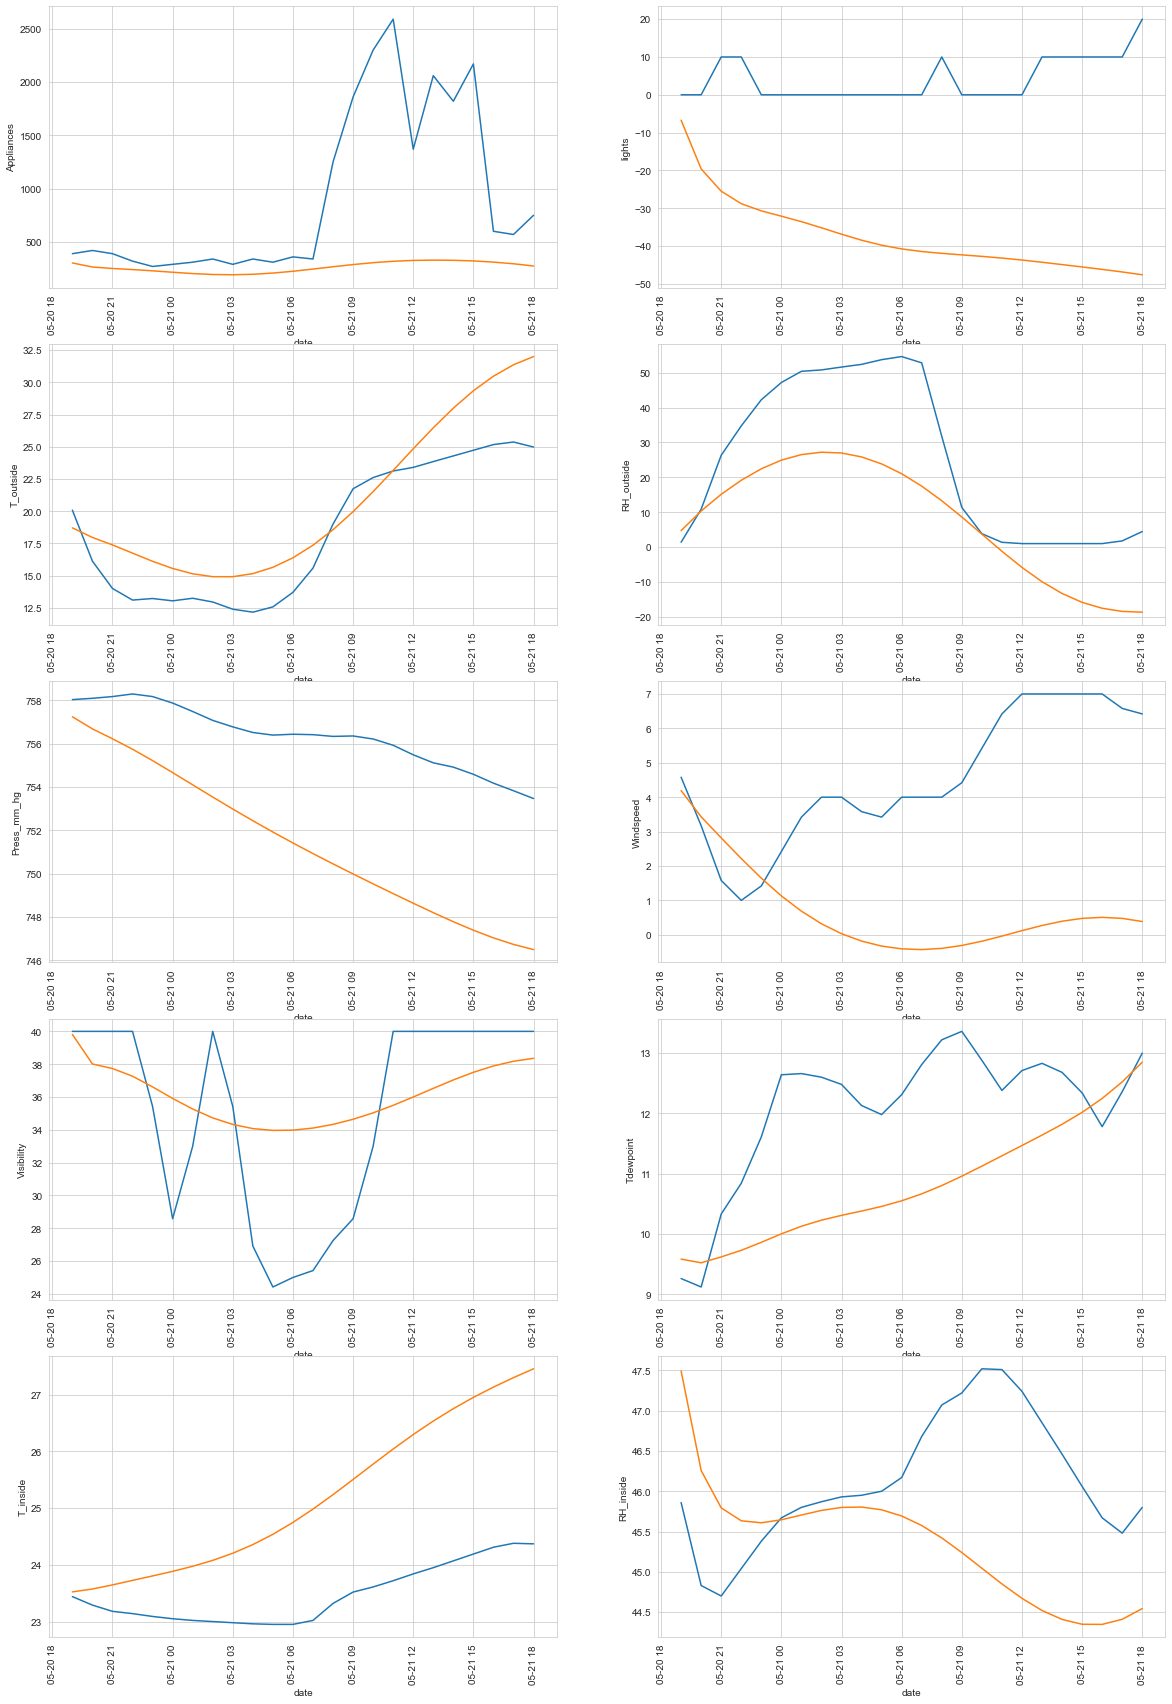

In [53]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i])
    test_eva["predictions"] = predictions[i].values
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);

# Univariate Time Series for Appliances Feature

In [54]:
df_app = df[["Appliances"]]
df_app

,Appliances
date,
2016-01-11 17:00:00,330
2016-01-11 18:00:00,1060
2016-01-11 19:00:00,1040
2016-01-11 20:00:00,750
2016-01-11 21:00:00,620
...,...
2016-05-27 14:00:00,610
2016-05-27 15:00:00,460
2016-05-27 16:00:00,810


### Train Test Split

In [55]:
len(df_app)

3290

In [56]:
# How many rows per day?
24

24

In [57]:
test_days = 7

In [58]:
test_ind = test_days*24

In [59]:
test_ind

168

In [60]:
train = df_app.iloc[:-test_ind]
test = df_app.iloc[-test_ind:]

In [61]:
train.shape, test.shape

((3122, 1), (168, 1))

### Scale Data

In [62]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
scaler.fit(train)

MinMaxScaler()

In [65]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [66]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [67]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [68]:
n_features = train_scaled.shape[1]

In [69]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [70]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [71]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 33s 10ms/step - loss: 0.0135 - val_loss: 0.0140
Epoch 2/10
3098/3098 [==============================] - 29s 9ms/step - loss: 0.0127 - val_loss: 0.0129
Epoch 3/10
3098/3098 [==============================] - 29s 9ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 4/10
3098/3098 [==============================] - 30s 10ms/step - loss: 0.0123 - val_loss: 0.0126
Epoch 5/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0121 - val_loss: 0.0121
Epoch 6/10
3098/3098 [==============================] - 30s 10ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 7/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 8/10
3098/3098 [==============================] - 29s 9ms/step - loss: 0.0116 - val_loss: 0.0125
Epoch 9/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 10/10
3098/3098 [==============================] - 30s 10ms/s

<AxesSubplot:>

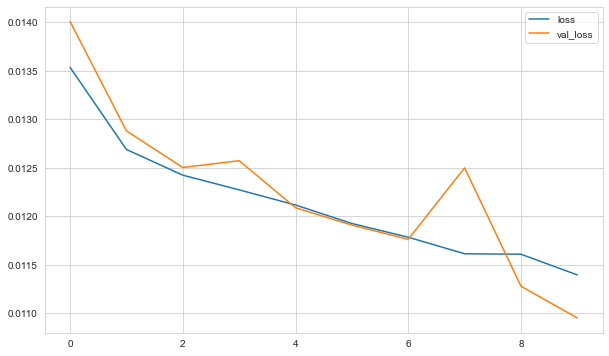

In [72]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [73]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [74]:
predictions_scaled

[array([0.10484365], dtype=float32),
 array([0.10267868], dtype=float32),
 array([0.09881936], dtype=float32),
 array([0.09573125], dtype=float32),
 array([0.09451599], dtype=float32),
 array([0.09597142], dtype=float32),
 array([0.10065864], dtype=float32),
 array([0.10815628], dtype=float32),
 array([0.12003918], dtype=float32),
 array([0.13170004], dtype=float32),
 array([0.14411521], dtype=float32),
 array([0.15270816], dtype=float32),
 array([0.15613747], dtype=float32),
 array([0.15245715], dtype=float32),
 array([0.13892844], dtype=float32),
 array([0.1277742], dtype=float32),
 array([0.11599708], dtype=float32),
 array([0.10644427], dtype=float32),
 array([0.09891406], dtype=float32),
 array([0.09393986], dtype=float32),
 array([0.0910472], dtype=float32),
 array([0.09067628], dtype=float32),
 array([0.0918973], dtype=float32),
 array([0.09329556], dtype=float32)]

In [75]:
test_scaled[:length]

array([[0.06321839],
       [0.07183908],
       [0.06321839],
       [0.04310345],
       [0.02873563],
       [0.03448276],
       [0.04022989],
       [0.04885057],
       [0.03448276],
       [0.04885057],
       [0.04022989],
       [0.0545977 ],
       [0.04885057],
       [0.31034483],
       [0.48563218],
       [0.61206897],
       [0.6954023 ],
       [0.34482759],
       [0.54310345],
       [0.47413793],
       [0.57471264],
       [0.12356322],
       [0.11494253],
       [0.16666667]])

In [76]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.20827523780191237 
mae: 0.17205902415245658 
mse: 0.059295968917318996 
rmse: 0.24350763626079366


## Inverse Transformations and Compare

In [70]:
predictions = scaler.inverse_transform(predictions_scaled)

In [71]:
compare = test[:length]

In [72]:
compare['Predictions'] = predictions

In [73]:
compare

,Appliances,Predictions
date,,
2016-05-20 19:00:00,390,550.847
2016-05-20 20:00:00,420,546.738
2016-05-20 21:00:00,390,531.071
2016-05-20 22:00:00,320,514.506
2016-05-20 23:00:00,270,502.661
2016-05-21 00:00:00,290,497.948
2016-05-21 01:00:00,310,502.520
2016-05-21 02:00:00,340,514.347
2016-05-21 03:00:00,290,537.842


<AxesSubplot:xlabel='date'>

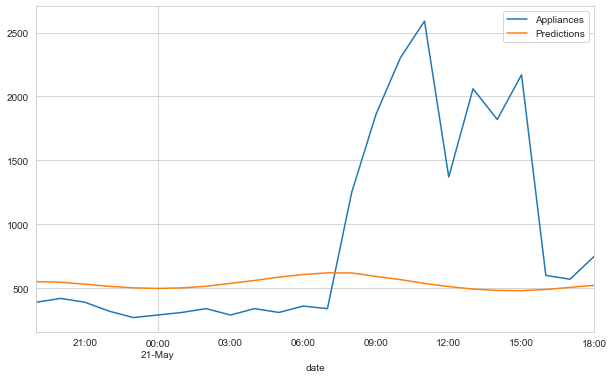

In [74]:
compare.plot()

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>